# Задание к лекции «Корреляция и корреляционный анализ»

### датасет Mortality and Water Hardness

данные по средней годовой смертности на 100000 населения и концентрации кальция в питьевой воде для 61 большого города в Англии и Уэльсе. Города дополнительно поделены на северные и южные.

### Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?  
Построить точечный график  
Рассчитать коэффициенты корреляции Пирсона и Спирмена  
Построить модель линейной регрессии  
Рассчитать коэффициент детерминации  
Вывести график остатков  

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 16,7
rcParams['font.size'] = 16

In [77]:
data = pd.read_csv("water.csv", sep=",")
data.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


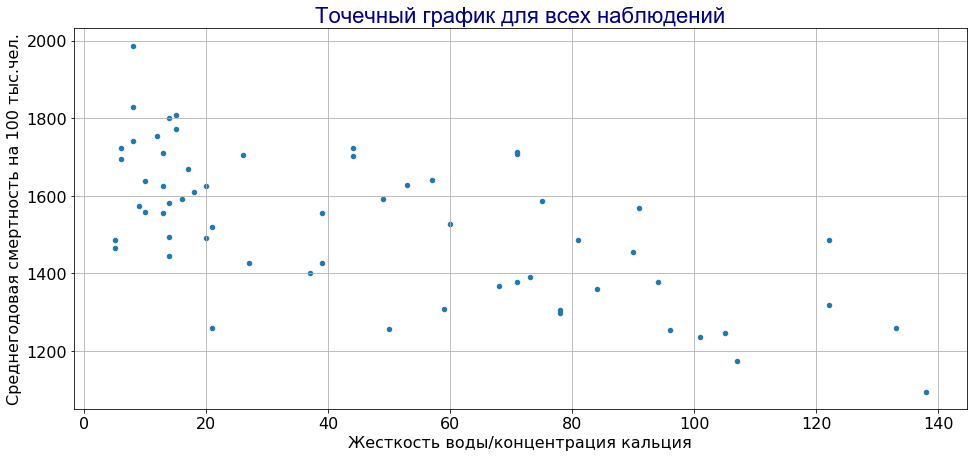

In [78]:
# точечный график
data.plot(kind='scatter', x='hardness', y='mortality')
plt.xlabel('Жесткость воды/концентрация кальция')
plt.ylabel('Среднегодовая смертность на 100 тыс.чел.')
plt.title('Точечный график для всех наблюдений', fontsize=22, fontname='Arial', color='darkblue')
plt.grid(True)

In [79]:
# коэффициент корреляции Пирсона
data[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [80]:
# коэффициент корреляции Спирмена
data[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


Коэффициент корреляции Пирсона равен -0,65, коэффициент корреляции Спирмена равен - 0,63. Это означает, что есть некоторая обратная зависимость между жесткостью воды и смертностью населения: в городах, где концентрации кальция в воде больше, смертность населения меньше, и наоборот: в регионах с "мягкой" водой смертность населения выше.  
Теоретически, эти два показателя могут быть взаимосвязаны, так как кальций входит в число элементов, необходимых для нормальной работы сердца. А ишемическая болезнь сердца и инсульт возглавляют список причин смерти в мире. Но, может ли избыток кальция в воде компенсировать недостаток кальция в организме - это уже вопрос к врачам и специальным исследованиям. 

In [81]:
# модель линейной регрессии
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = data[['hardness']]
y = data['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
# test_size - доля тестовой выборки, 
# random_state - может быть любым, нужен чтобы генератор случайных чисел при повторных расчетах выдавал один и тот же результат 

In [82]:
X_train.shape

(42, 1)

In [83]:
y_train.shape

(42,)

In [84]:
model = LinearRegression()
model.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
model.coef_

array([-2.93028891])

In [86]:
model.intercept_

1663.7167089776137

In [87]:
y_pred = model.predict(X_test)
y_pred

array([1464.45706289, 1306.22146158, 1306.22146158, 1435.15417376,
       1350.17579528, 1637.34410876, 1619.76237528, 1619.76237528,
       1602.1806418 , 1490.8296631 , 1259.33683897, 1534.7839968 ,
       1520.13255224, 1610.97150854, 1584.59890832, 1417.57244028,
       1496.69024093, 1625.62295311, 1587.52919724])

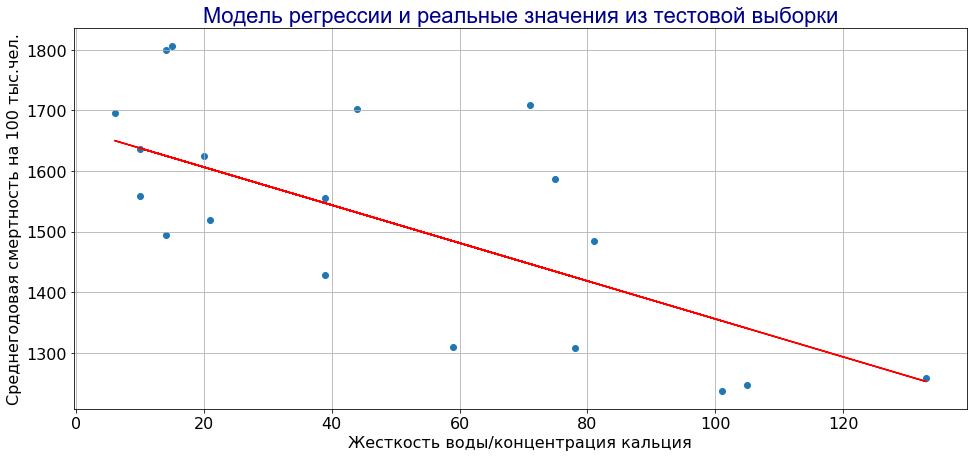

In [70]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.xlabel('Жесткость воды/концентрация кальция')
plt.ylabel('Среднегодовая смертность на 100 тыс.чел.')
plt.title('Модель регрессии и реальные значения из тестовой выборки', fontsize=22, fontname='Arial', color='darkblue')
plt.grid(True)

**Уравнение линейной регрессии: y = -3,13x + 1668,97**    
На графике выше видно, что в реальности значения тестовой выборки достаточно сильно разбросаны относительно полученной регрессионной модели. 

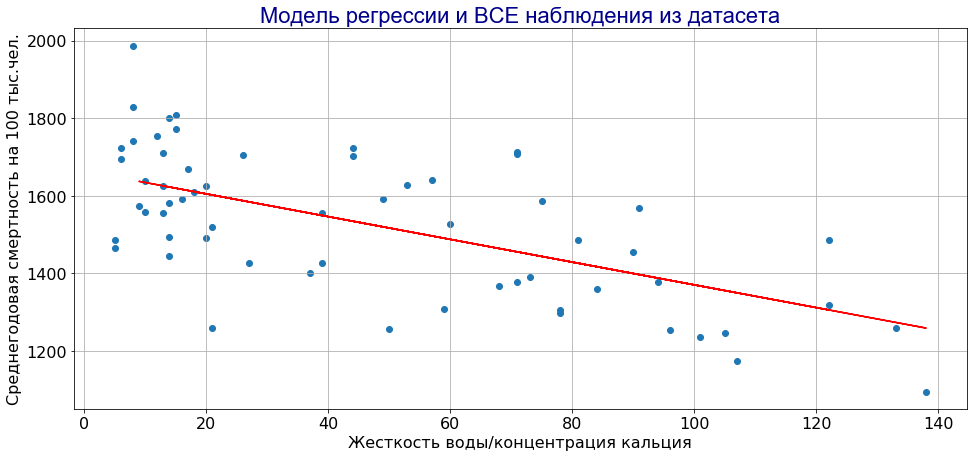

In [88]:
plt.scatter(X, y)
plt.plot(X_test, y_pred, c='r')
plt.xlabel('Жесткость воды/концентрация кальция')
plt.ylabel('Среднегодовая смертность на 100 тыс.чел.')
plt.title('Модель регрессии и ВСЕ наблюдения из датасета', fontsize=22, fontname='Arial', color='darkblue')
plt.grid(True)

In [89]:
# коэффициент детерминации
model.score(X_test, y_test) 

0.5710063963317071

Коэффициент детерминации - 0,5 - находится ровно посередине между 0 (модель регрессии совсем не объясняет зависимость) и 1 (модель регрессии хорошо объсняет зависимость данных). У нас нечто среднее, может работать, может не работать. По идее, надо копать дальше и искать дополнительные данные. 

In [107]:
# график остатков
residual = (y_test - y_pred)
res = pd.DataFrame()
res['test_data']=y_test
res['pred_data']=y_pred
res['delta']=residual
res.head()

,test_data,pred_data,delta
47,1369,1464.457063,-95.457063
18,1318,1306.221462,11.778538
58,1486,1306.221462,179.778538
13,1307,1435.154174,-128.154174
37,1175,1350.175795,-175.175795


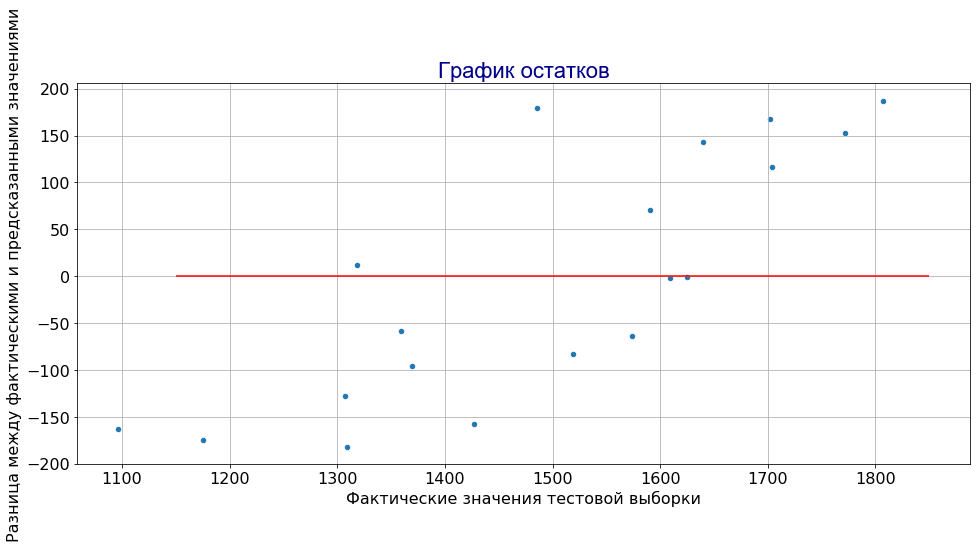

In [136]:
res.plot(kind='scatter', x='test_data', y='delta')
plt.hlines(0, 1150, 1850, color = 'red')
plt.xlabel('Фактические значения тестовой выборки')
plt.ylabel('Разница между фактическими и предсказанными значениями')
plt.title('График остатков', fontsize=22, fontname='Arial', color='darkblue')
plt.grid(True)

На графике остатков видно, что до определенного значения Х предсказанные значения больше фактических (факт - прогноз < 0), а потом наоборот - факт - прогноз > 0. На основании этого можно предположить, что зависимость может быть не совсем линейной. Или мы что-то не учли. 

### Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [111]:
# датасет для северных городов
north = data[data['location'] == 'North'] )
north.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1 to 60
Data columns (total 5 columns):
Unnamed: 0    35 non-null int64
location      35 non-null object
town          35 non-null object
mortality     35 non-null int64
hardness      35 non-null int64
dtypes: int64(3), object(2)
memory usage: 1.6+ KB


In [112]:
# датасет для южных городов
south = data[data['location'] == 'South'] 
south.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 59
Data columns (total 5 columns):
Unnamed: 0    26 non-null int64
location      26 non-null object
town          26 non-null object
mortality     26 non-null int64
hardness      26 non-null int64
dtypes: int64(3), object(2)
memory usage: 1.2+ KB


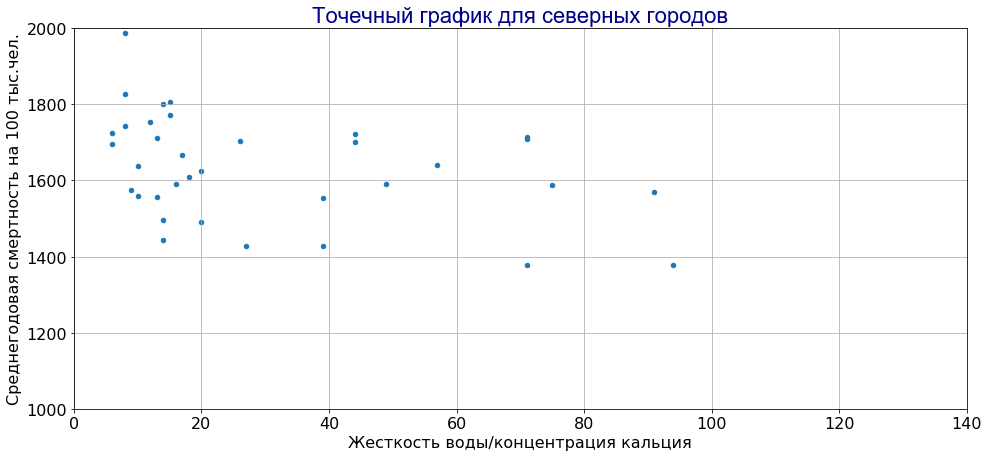

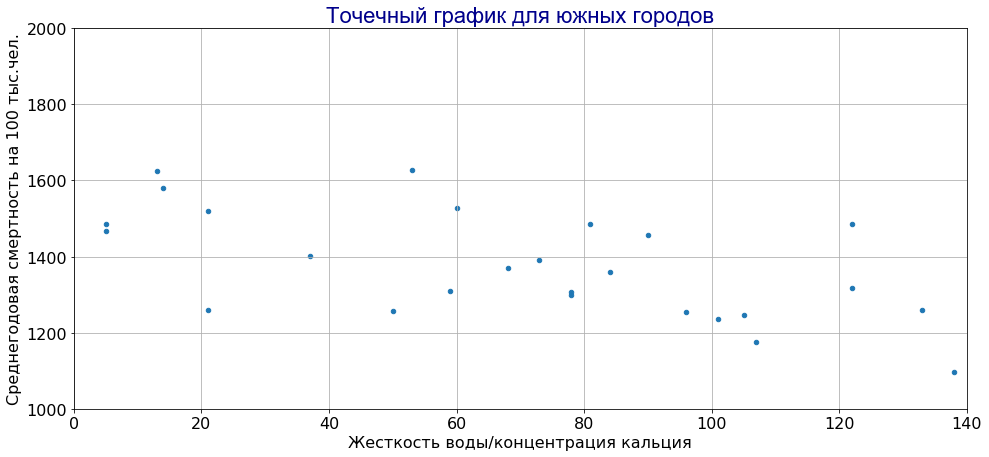

In [115]:
# точечные графики
north.plot(kind='scatter', x='hardness', y='mortality')
plt.xlabel('Жесткость воды/концентрация кальция')
plt.ylabel('Среднегодовая смертность на 100 тыс.чел.')
plt.title('Точечный график для северных городов', fontsize=22, fontname='Arial', color='darkblue')
plt.axis([0,140,1000,2000]) #  диапазон для осей x и y, задается в списке [xmin, xmax, ymin, ymax]
plt.grid(True)
south.plot(kind='scatter', x='hardness', y='mortality')
plt.xlabel('Жесткость воды/концентрация кальция')
plt.ylabel('Среднегодовая смертность на 100 тыс.чел.')
plt.title('Точечный график для южных городов', fontsize=22, fontname='Arial', color='darkblue')
plt.axis([0,140,1000,2000]) #  диапазон для осей x и y, задается в списке [xmin, xmax, ymin, ymax]
plt.grid(True)

Если посмотреть на точечные графики для регионов по-отдельности, то сходу понять, есть ли зависимость, достаточно сложно.

In [119]:
# коэффициент корреляции Пирсона
print('Коэффициент корреляции Пирсона для северных городов')
north[['hardness', 'mortality']].corr()

Коэффициент корреляции Пирсона для северных городов


,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [120]:
print('Коэффициент корреляции Пирсона для южных городов')
south[['hardness', 'mortality']].corr()

Коэффициент корреляции Пирсона для южных городов


,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [123]:
# коэффициент корреляции Спирмена
print('Коэффициент корреляции Спирмена для северных городов')
north[['hardness', 'mortality']].corr(method='spearman')

Коэффициент корреляции Спирмена для северных городов


,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [124]:
# коэффициент корреляции Спирмена
print('Коэффициент корреляции Спирмена для южных городов')
south[['hardness', 'mortality']].corr(method='spearman')

Коэффициент корреляции Спирмена для южных городов


,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


Если верить коэффициентам корреляции, то относительно заметная обратная взаимосвязь между исследуемыми показателями есть в южных городах, в северных с этим плохо - вроде корреляция есть, но очень незначительная.

### Модель линейной регрессии для северных городов

In [127]:
# модель линейной регрессии для северных городов
X_n = north[['hardness']]
y_n = north['mortality']
X_n_train, X_n_test, y_n_train, y_n_test = train_test_split(X_n, y_n, test_size=0.3, random_state=3)

model_n = LinearRegression()
model_n.fit(X_n_train, y_n_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [129]:
model_n.coef_

array([-1.32525049])

In [128]:
model_n.intercept_

1662.2593600075452

In [132]:
y_n_pred = model_n.predict(X_n_test)
y_n_pred

array([1642.38060266, 1568.16657525, 1627.80284728, 1654.30785707,
       1651.65735609, 1626.47759679, 1641.05535217, 1651.65735609,
       1650.3321056 , 1568.16657525, 1649.00685511])

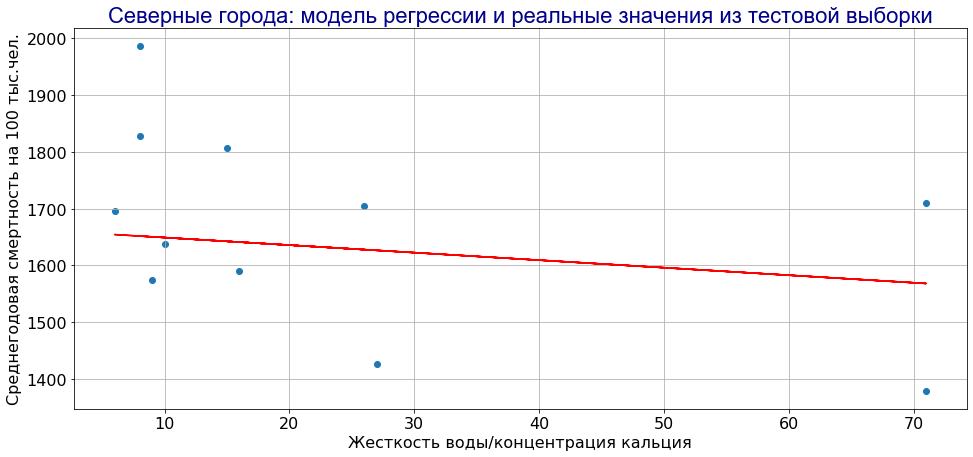

In [133]:
plt.scatter(X_n_test, y_n_test)
plt.plot(X_n_test, y_n_pred, c='r')
plt.xlabel('Жесткость воды/концентрация кальция')
plt.ylabel('Среднегодовая смертность на 100 тыс.чел.')
plt.title('Северные города: модель регрессии и реальные значения из тестовой выборки', fontsize=22, fontname='Arial', color='darkblue')
plt.grid(True)

In [134]:
# коэффициент детерминации для северных городов
model_n.score(X_n_test, y_n_test) 

0.08393541016678863

In [135]:
# график остатков для северных городов
residual_n = (y_n_test - y_n_pred)
res_n = pd.DataFrame()
res_n['test_data']=y_n_test
res_n['pred_data']=y_n_pred
res_n['delta']=residual_n
res_n.head()

,test_data,pred_data,delta
6,1807,1642.380603,164.619397
60,1378,1568.166575,-190.166575
30,1704,1627.802847,76.197153
40,1696,1654.307857,41.692143
29,1828,1651.657356,176.342644


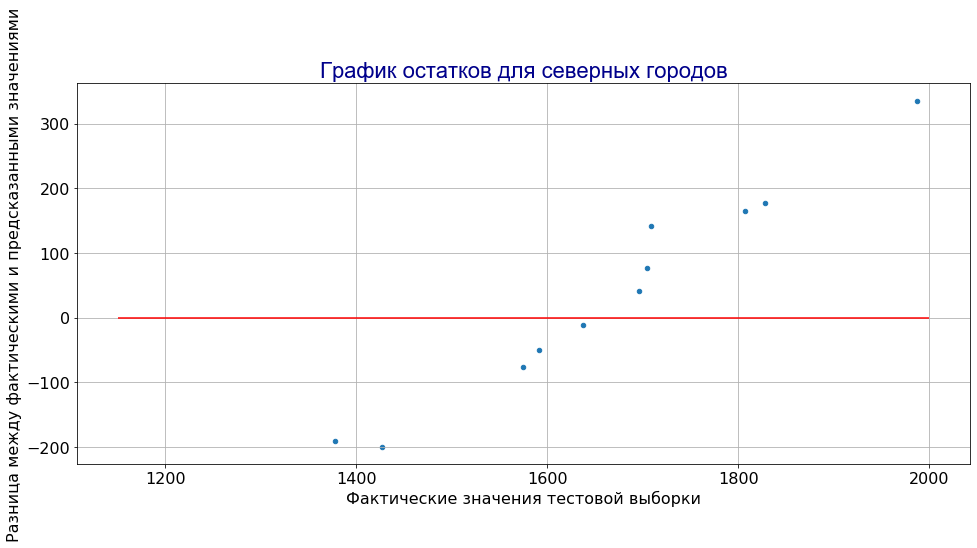

In [145]:
res_n.plot(kind='scatter', x='test_data', y='delta')
plt.hlines(0, 1150, 2000, color = 'red')
plt.xlabel('Фактические значения тестовой выборки')
plt.ylabel('Разница между фактическими и предсказанными значениями')
plt.title('График остатков для северных городов', fontsize=22, fontname='Arial', color='darkblue')
plt.grid(True)

На имеющихся данных для северных городов можно было бы построить такую модель линейной регрессии, описывающую взаимосвязь между жесткостью воды и смертностью населения:   
y = -1,33x + 1662,26   
Но эту модель вряд ли возможно использовать, так как коэффициент детерминации стремится к нулю - 0,08 (модель вряд ли что-то объясняет) и остатки на графике распределены не равномерно, а согласно некоторой закономерности (сначала предсказанные значения больше, а потом меньше фактических). 

### Модель линейной регрессии для южных городов

In [138]:
# модель линейной регрессии для южных городов
X_s = south[['hardness']]
y_s = south['mortality']
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y_s, test_size=0.3, random_state=3)

model_s = LinearRegression()
model_s.fit(X_s_train, y_s_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [139]:
model_s.coef_

array([-1.72817646])

In [140]:
model_s.intercept_

1493.7070349128612

In [141]:
y_s_pred = model_s.predict(X_s_test)
y_s_pred

array([1319.16121282, 1338.17115384, 1469.51256452, 1402.11368273,
       1308.79215408, 1485.06615263, 1391.74462399, 1358.90927132])

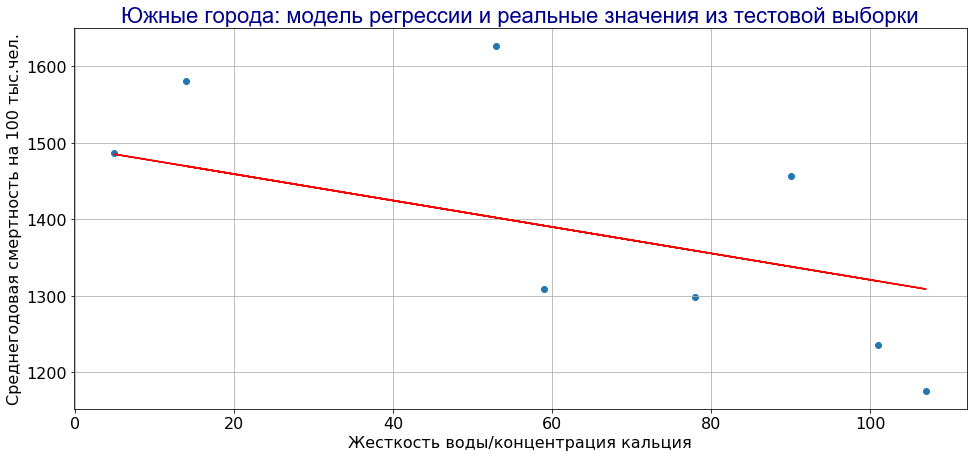

In [142]:
plt.scatter(X_s_test, y_s_test)
plt.plot(X_s_test, y_s_pred, c='r')
plt.xlabel('Жесткость воды/концентрация кальция')
plt.ylabel('Среднегодовая смертность на 100 тыс.чел.')
plt.title('Южные города: модель регрессии и реальные значения из тестовой выборки', fontsize=22, fontname='Arial', color='darkblue')
plt.grid(True)

In [143]:
# коэффициент детерминации для северных городов
model_s.score(X_s_test, y_s_test) 

0.4119723765575952

In [144]:
# график остатков для северных городов
residual_s = (y_s_test - y_s_pred)
res_s = pd.DataFrame()
res_s['test_data']=y_s_test
res_s['pred_data']=y_s_pred
res_s['delta']=residual_s
res_s.head()

,test_data,pred_data,delta
41,1236,1319.161213,-83.161213
39,1456,1338.171154,117.828846
32,1581,1469.512565,111.487435
57,1627,1402.113683,224.886317
37,1175,1308.792154,-133.792154


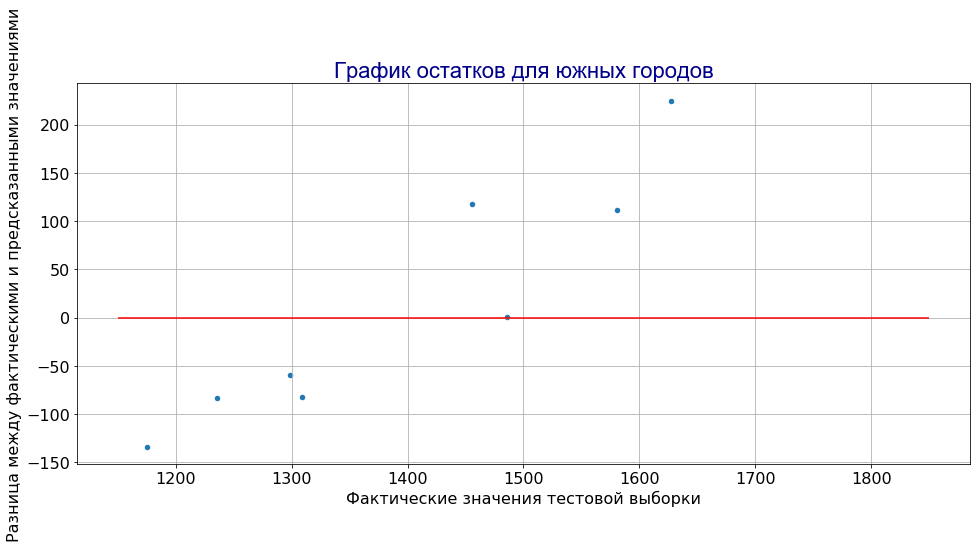

In [146]:
res_s.plot(kind='scatter', x='test_data', y='delta')
plt.hlines(0, 1150, 1850, color = 'red')
plt.xlabel('Фактические значения тестовой выборки')
plt.ylabel('Разница между фактическими и предсказанными значениями')
plt.title('График остатков для южных городов', fontsize=22, fontname='Arial', color='darkblue')
plt.grid(True)

Для южных городов модель регрессии могла бы выглядеть так:   
y = -1,73x + 1493,71  
Но с практическим использованием у нас опять проблемы: 
коэффициент детерминации (0,41) недостаточно высок, чтобы модели можно было доверять. И остатки на графике распределены не случайно/равномерно. 
   
   **В итоге разбиение на 2 группы данных, которые при анализе давали такую симпатичную картинку с регрессией, развеяло все иллюзии относительно какой-то линейной зависимости. Возможно, зависимость есть, но она нелинейная, или мы не все факторы учли, или у нас слишком маленькое число наблюдений (всего 61 город), чтобы делать какие-либо относительно достоверные выводы (особенно при разбиении на подгруппы).**